In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# Load the data
data = pd.read_csv('cleaned_hate_crime_forecasting.csv')

In [88]:
data

,incident_date,region_name,offender_race,state_name,grouped_total_offender_count,grouped_victim_count,generalized_offense_name,generalized_location_name
0,1991-01-01,Midwest,White,Minnesota,Few,Few,violent crimes,Residence
1,1991-01-01,Northeast,White,Pennsylvania,Few,Few,violent crimes,Miscellaneous
2,1991-01-01,Northeast,White,New York,Few,Few,violent crimes,Miscellaneous
3,1991-01-01,South,Black or African American,Maryland,Several,Few,violent crimes,Public Place
4,1991-01-01,Northeast,Black or African American,New York,Few,Few,violent crimes,Miscellaneous
...,...,...,...,...,...,...,...,...
134434,2022-12-31,South,Black or African American,Texas,Few,Few,violent crimes,Residence
134435,2022-12-31,West,Black or African American,California,Few,Few,violent crimes,Law Enforcement
134436,2022-12-31,West,White,Colorado,Few,Few,violent crimes,Public Place
134437,2022-12-31,Northeast,White,New Jersey,Few,Few,violent crimes,Residence


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134439 entries, 0 to 134438
Data columns (total 8 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   incident_date                 134439 non-null  object
 1   region_name                   134439 non-null  object
 2   offender_race                 134439 non-null  object
 3   state_name                    134439 non-null  object
 4   grouped_total_offender_count  134439 non-null  object
 5   grouped_victim_count          134439 non-null  object
 6   generalized_offense_name      134439 non-null  object
 7   generalized_location_name     134439 non-null  object
dtypes: object(8)
memory usage: 8.2+ MB


In [90]:
# Convert the incident_date to datetime
data['incident_date'] = pd.to_datetime(data['incident_date'])

In [91]:
# add a new column for year
data['year'] = data['incident_date'].dt.year

In [92]:
data

,incident_date,region_name,offender_race,state_name,grouped_total_offender_count,grouped_victim_count,generalized_offense_name,generalized_location_name,year
0,1991-01-01,Midwest,White,Minnesota,Few,Few,violent crimes,Residence,1991
1,1991-01-01,Northeast,White,Pennsylvania,Few,Few,violent crimes,Miscellaneous,1991
2,1991-01-01,Northeast,White,New York,Few,Few,violent crimes,Miscellaneous,1991
3,1991-01-01,South,Black or African American,Maryland,Several,Few,violent crimes,Public Place,1991
4,1991-01-01,Northeast,Black or African American,New York,Few,Few,violent crimes,Miscellaneous,1991
...,...,...,...,...,...,...,...,...,...
134434,2022-12-31,South,Black or African American,Texas,Few,Few,violent crimes,Residence,2022
134435,2022-12-31,West,Black or African American,California,Few,Few,violent crimes,Law Enforcement,2022
134436,2022-12-31,West,White,Colorado,Few,Few,violent crimes,Public Place,2022
134437,2022-12-31,Northeast,White,New Jersey,Few,Few,violent crimes,Residence,2022


# Time Series Analysis

## Number of Hate Crimes by State

### Number of Hate Crimes by State for all states

In [93]:
# Number of Hate Crimes by State
df_state = data.groupby('state_name').size().reset_index(name='Number of incidents')
df_state

,state_name,Number of incidents
0,Alabama,491
1,Alaska,181
2,Arizona,4441
3,Arkansas,795
4,California,23508
5,Colorado,3284
6,Connecticut,1936
7,Delaware,421
8,District of Columbia,1362
9,Federal,83


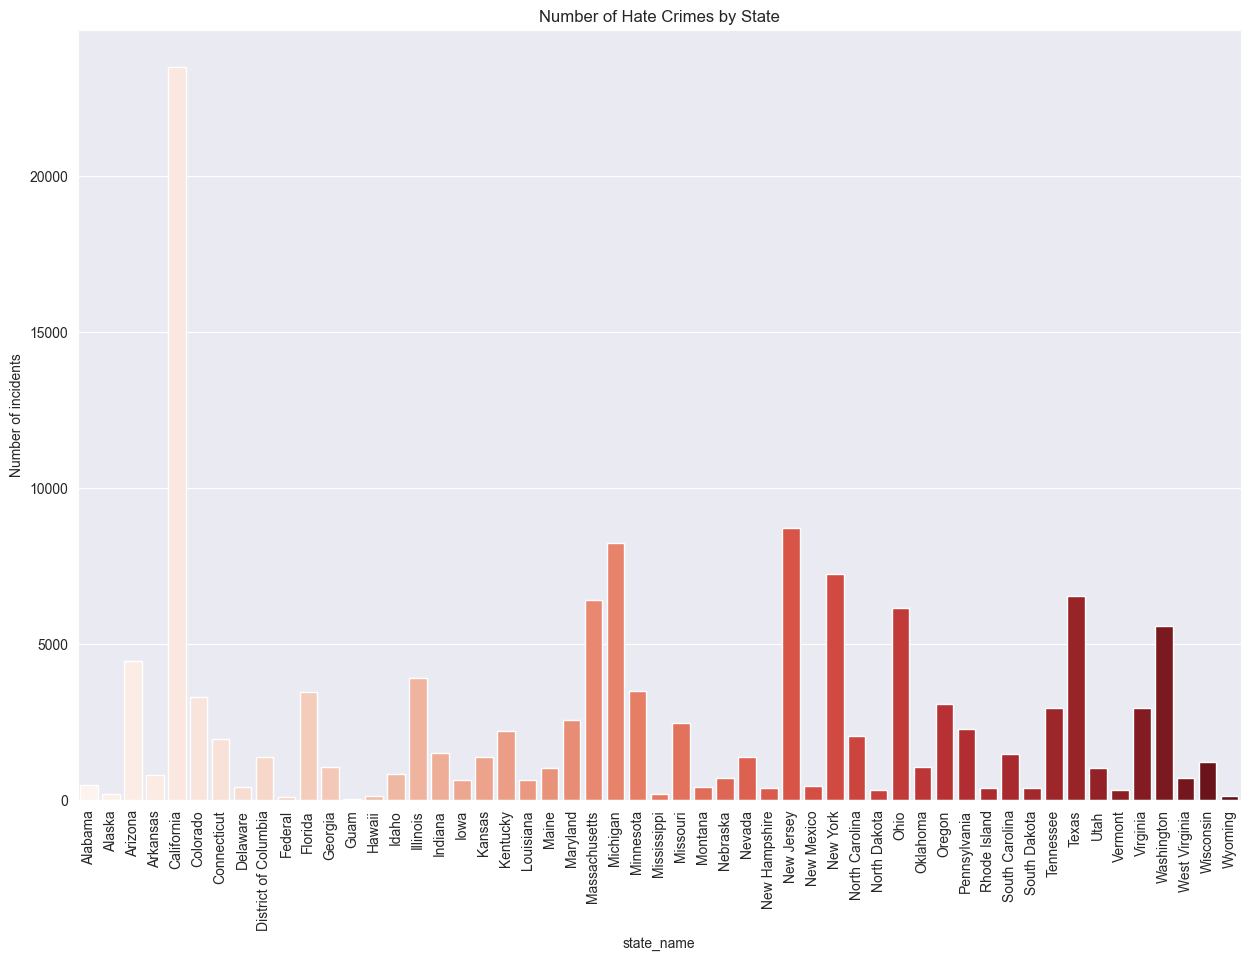

In [94]:
# plot the number of incidents by state
plt.figure(figsize=(15, 10))
# rotate the x-axis labels by 90 degrees
sns.barplot(data=df_state, x='state_name', y='Number of incidents', palette='Reds', hue='state_name')
plt.xticks(rotation=90)
plt.title('Number of Hate Crimes by State')
plt.show()

In [95]:
# plot summary statistics
df_state.describe()

,Number of incidents
count,53.000000
mean,2536.584906
std,3691.251453
min,14.000000
25%,449.000000
50%,1362.000000
75%,3062.000000
max,23508.000000


### Number of Hate Crimes by State for the top 10 states

In [96]:
# find the top 10 states with the highest number of incidents 
top_10_states = df_state.sort_values(by='Number of incidents', ascending=False).head(10)
top_10_states

,state_name,Number of incidents
4,California,23508
32,New Jersey,8725
24,Michigan,8224
34,New York,7254
45,Texas,6546
23,Massachusetts,6412
37,Ohio,6157
49,Washington,5564
2,Arizona,4441
15,Illinois,3922


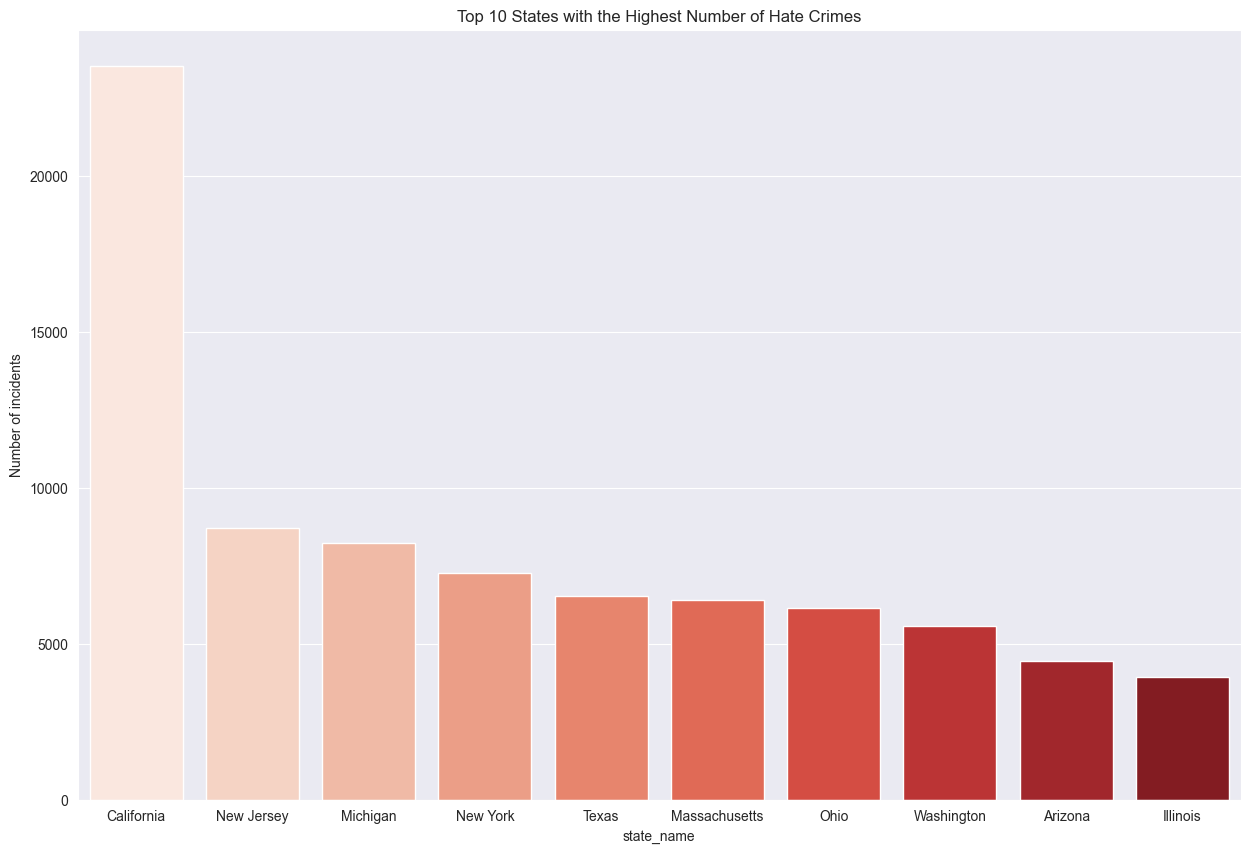

In [97]:
# plot the top 10 states with the highest number of incidents
plt.figure(figsize=(15, 10))
sns.barplot(data=top_10_states, x='state_name', y='Number of incidents', palette='Reds', hue='state_name')
plt.title('Top 10 States with the Highest Number of Hate Crimes')
plt.show()


In [98]:
# find the number of incidents by state per year for the top 10 states
df_state_year = data.groupby(['state_name', 'year']).size().reset_index(name='Number of incidents')

# find the number of incidents by state per year for the top 10 states
df_state_year = df_state_year[df_state_year['state_name'].isin(top_10_states['state_name'])]
df_state_year

,state_name,year,Number of incidents
49,Arizona,1991,27
50,Arizona,1992,127
51,Arizona,1993,147
52,Arizona,1994,121
53,Arizona,1995,146
...,...,...,...
1443,Washington,2018,363
1444,Washington,2019,300
1445,Washington,2020,245
1446,Washington,2021,276


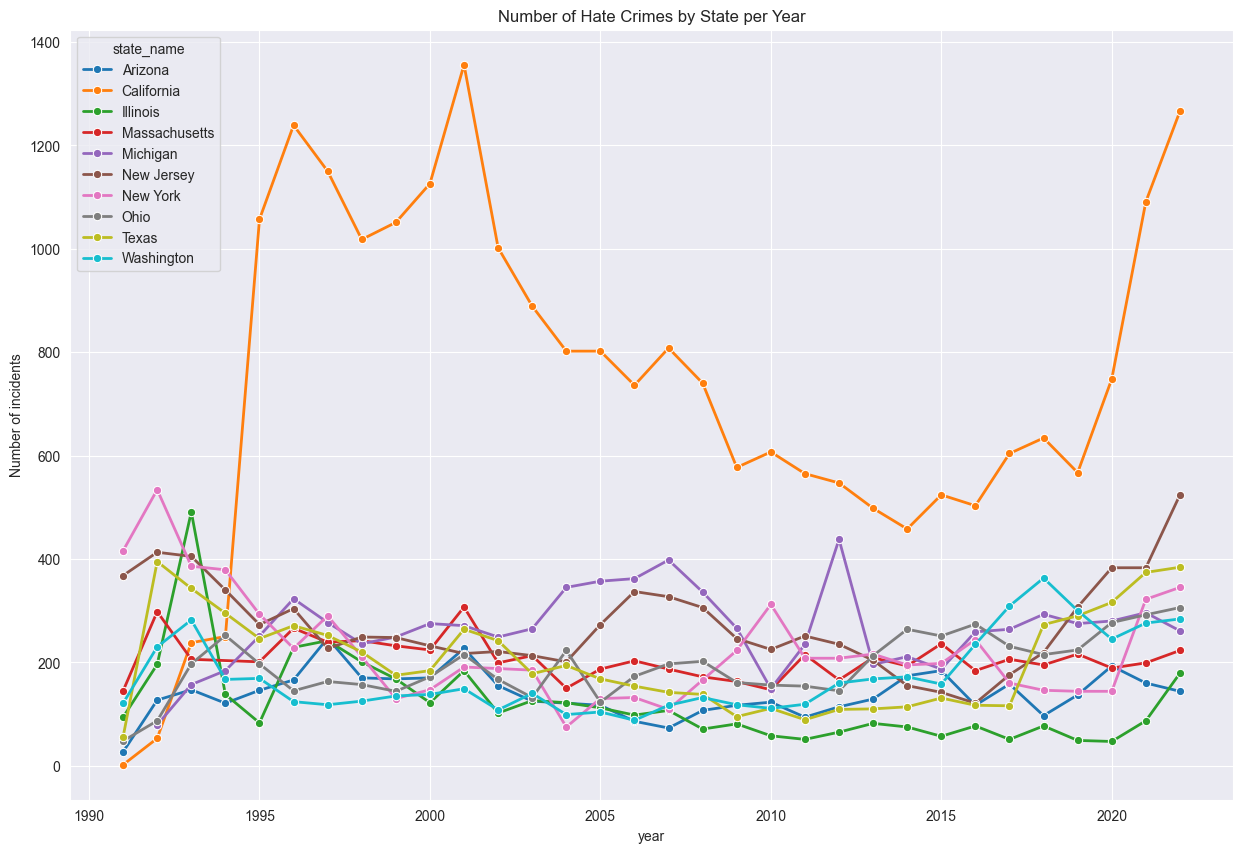

In [99]:
# plot the number of incidents by state per year for the top 10 states
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_state_year, x='year', y='Number of incidents', hue='state_name', linewidth=2, marker='o')
plt.title('Number of Hate Crimes by State per Year')
plt.show()

### Rolling Average of Hate Crimes by State for the top 10 states

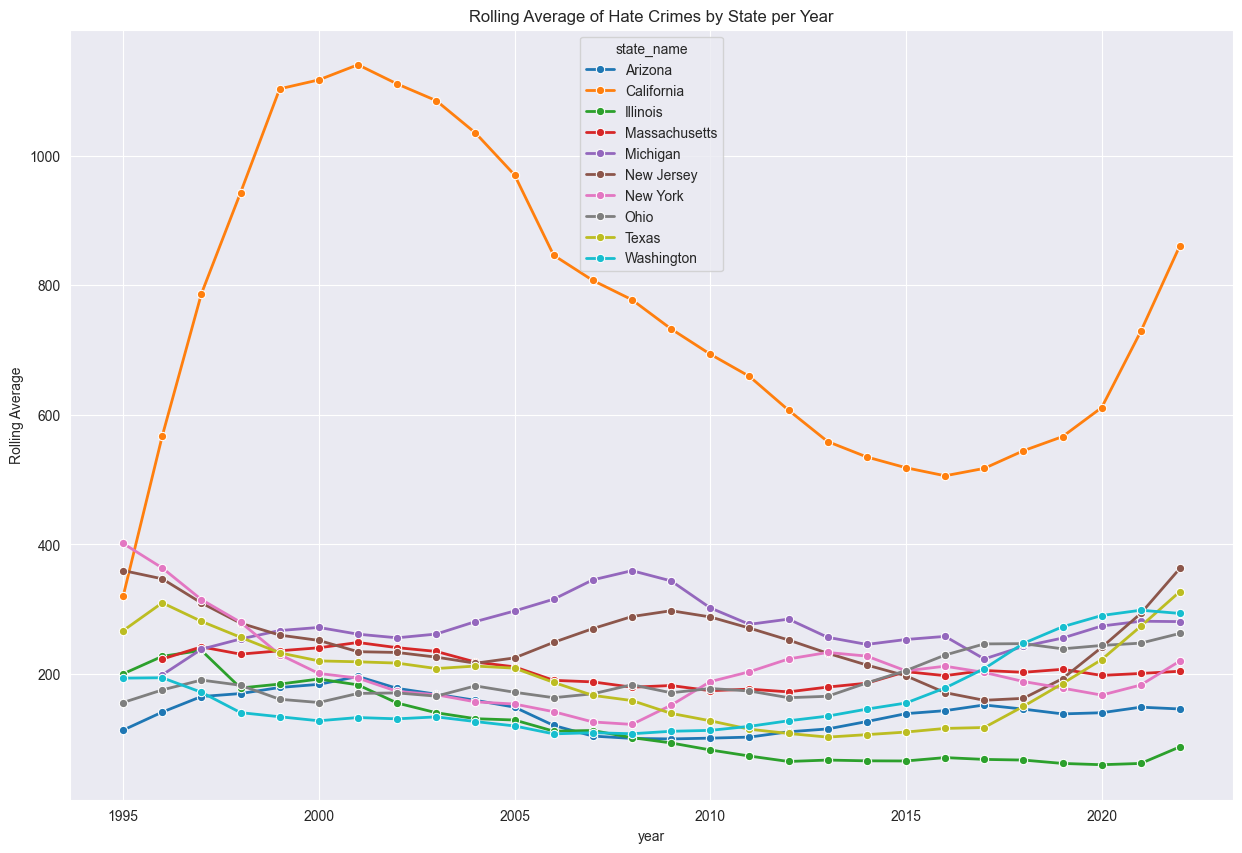

In [100]:
# plot the rolling average of hate crimes by state for the top 10 states
plt.figure(figsize=(15, 10))
df_state_year['Rolling Average'] = df_state_year.groupby('state_name')['Number of incidents'].transform(lambda x: x.rolling(5).mean())
sns.lineplot(data=df_state_year, x='year', y='Rolling Average', hue='state_name', linewidth=2, marker='o')
plt.title('Rolling Average of Hate Crimes by State per Year')
plt.show()

### The first order difference of the number of hate crimes by state for the top 10 states

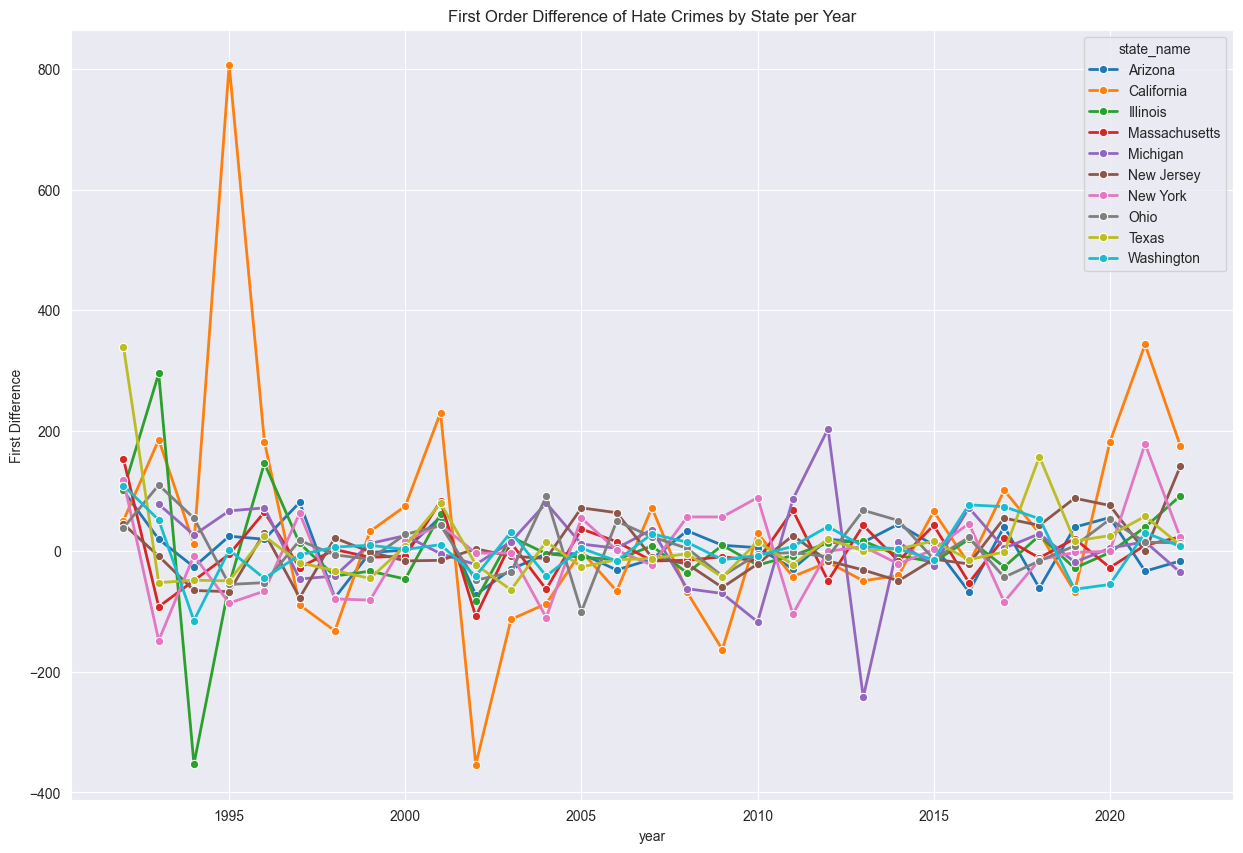

In [101]:
# plot the first order difference of hate crimes by state for the top 10 states
plt.figure(figsize=(15, 10))
df_state_year['First Difference'] = df_state_year.groupby('state_name')['Number of incidents'].transform(lambda x: x.diff())
sns.lineplot(data=df_state_year, x='year', y='First Difference', hue='state_name', linewidth=2, marker='o')
plt.title('First Order Difference of Hate Crimes by State per Year')
plt.show()

In [102]:
# plot summary statistics
df_state_year.describe()

,year,Number of incidents,Rolling Average,First Difference
count,318.000000,318.000000,278.000000,308.000000
mean,2006.588050,253.940252,250.692086,8.311688
std,9.208595,211.294582,195.892215,86.243426
min,1991.000000,2.000000,60.200000,-354.000000
25%,1999.000000,138.500000,152.100000,-26.000000
50%,2007.000000,200.000000,198.400000,2.500000
75%,2014.750000,275.000000,259.700000,33.250000
max,2022.000000,1356.000000,1140.200000,807.000000



## Number of Hate Crimes by Year

In [103]:
# create a new dataframe with the number of incidents by year
data_year = data.groupby('year').size().reset_index(name='Number of incidents')
data_year

,year,Number of incidents
0,1991,2600
1,1992,3939
2,1993,4358
3,1994,3368
4,1995,4572
5,1996,4917
6,1997,4683
7,1998,4251
8,1999,4288
9,2000,4492


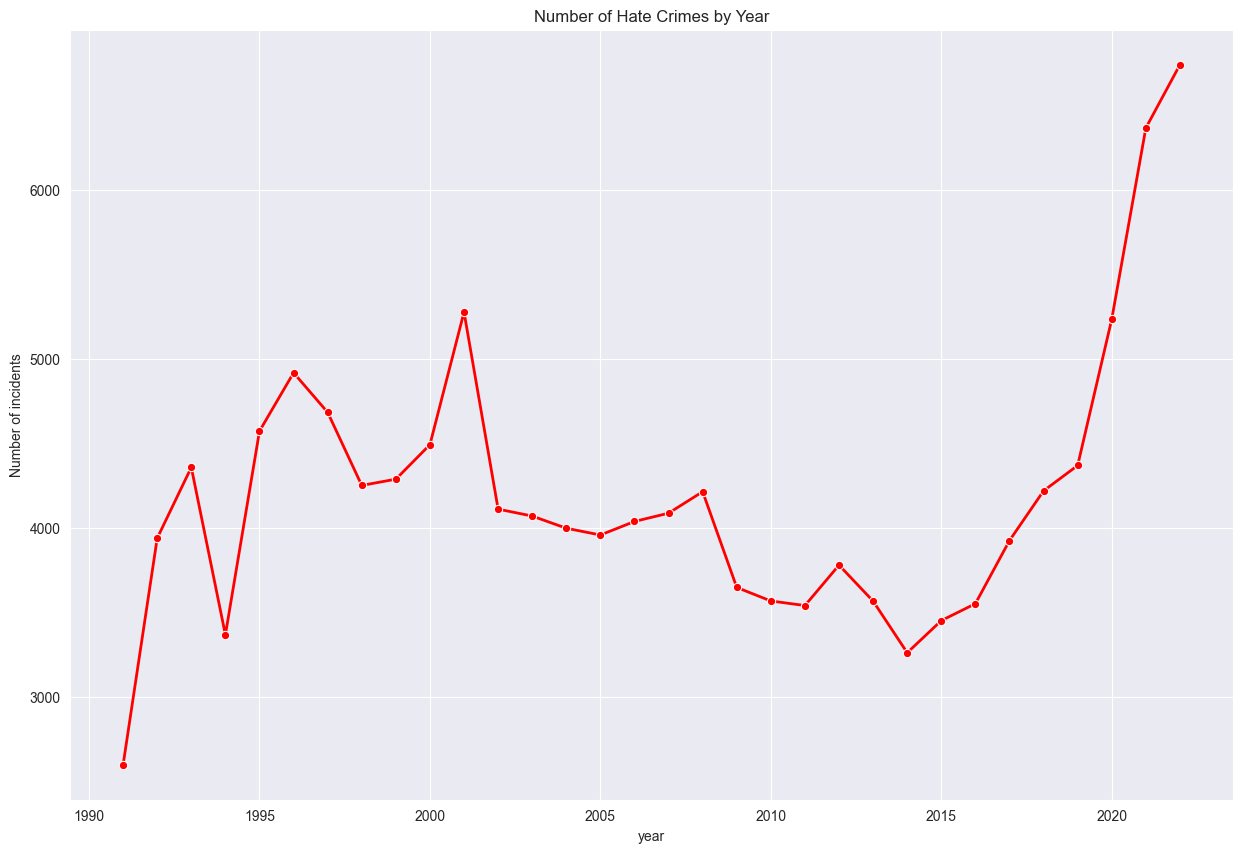

In [104]:
# plot the number of incidents by year
plt.figure(figsize=(15, 10))
sns.lineplot(data=data_year, x='year', y='Number of incidents', linewidth=2, marker='o', color='red')
plt.title('Number of Hate Crimes by Year')
plt.show()

### Rolling Average of Hate Crimes by Year

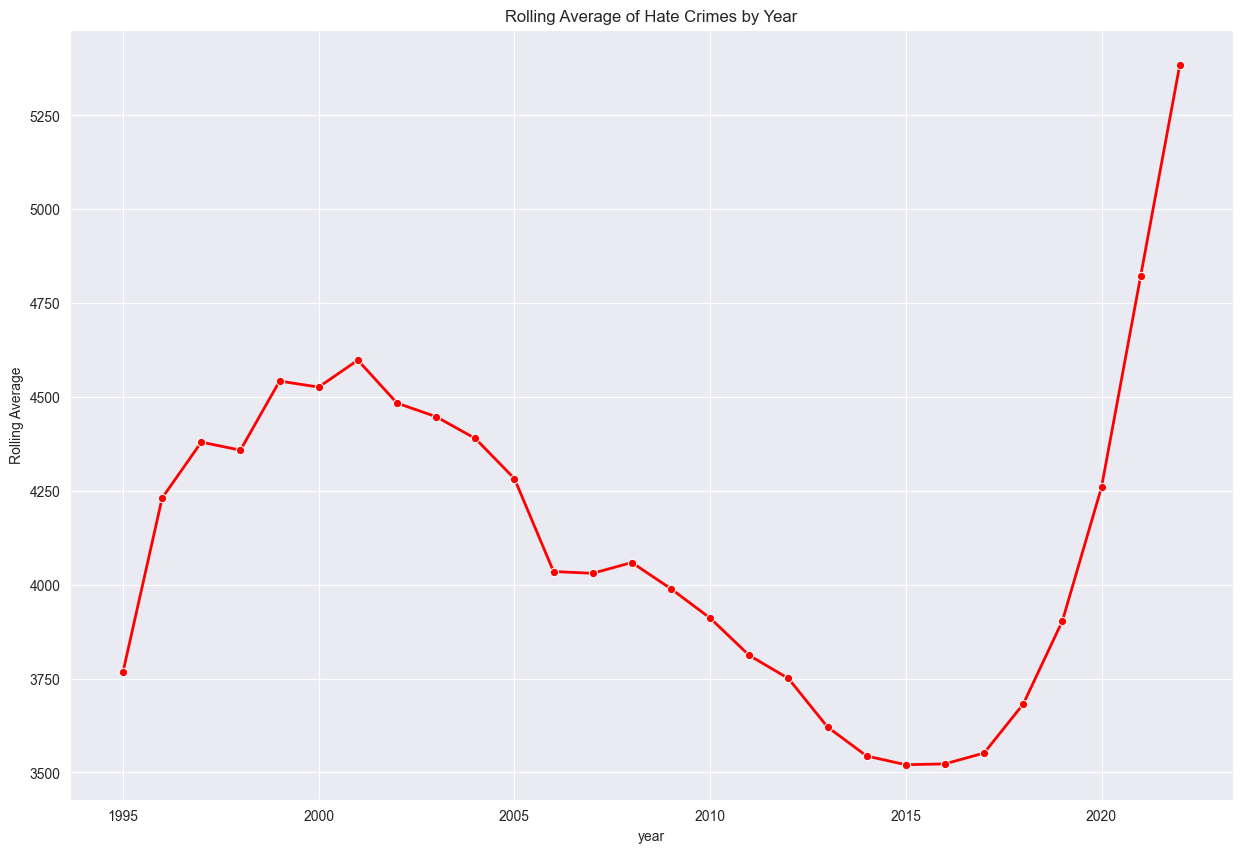

In [105]:
# Plot the rolling average of hate crimes by year
plt.figure(figsize=(15, 10))
data_year['Rolling Average'] = data_year['Number of incidents'].rolling(5).mean()
sns.lineplot(data=data_year, x='year', y='Rolling Average', linewidth=2, marker='o', color='red')
plt.title('Rolling Average of Hate Crimes by Year')
plt.show()

### The first order difference of the number of hate crimes by year

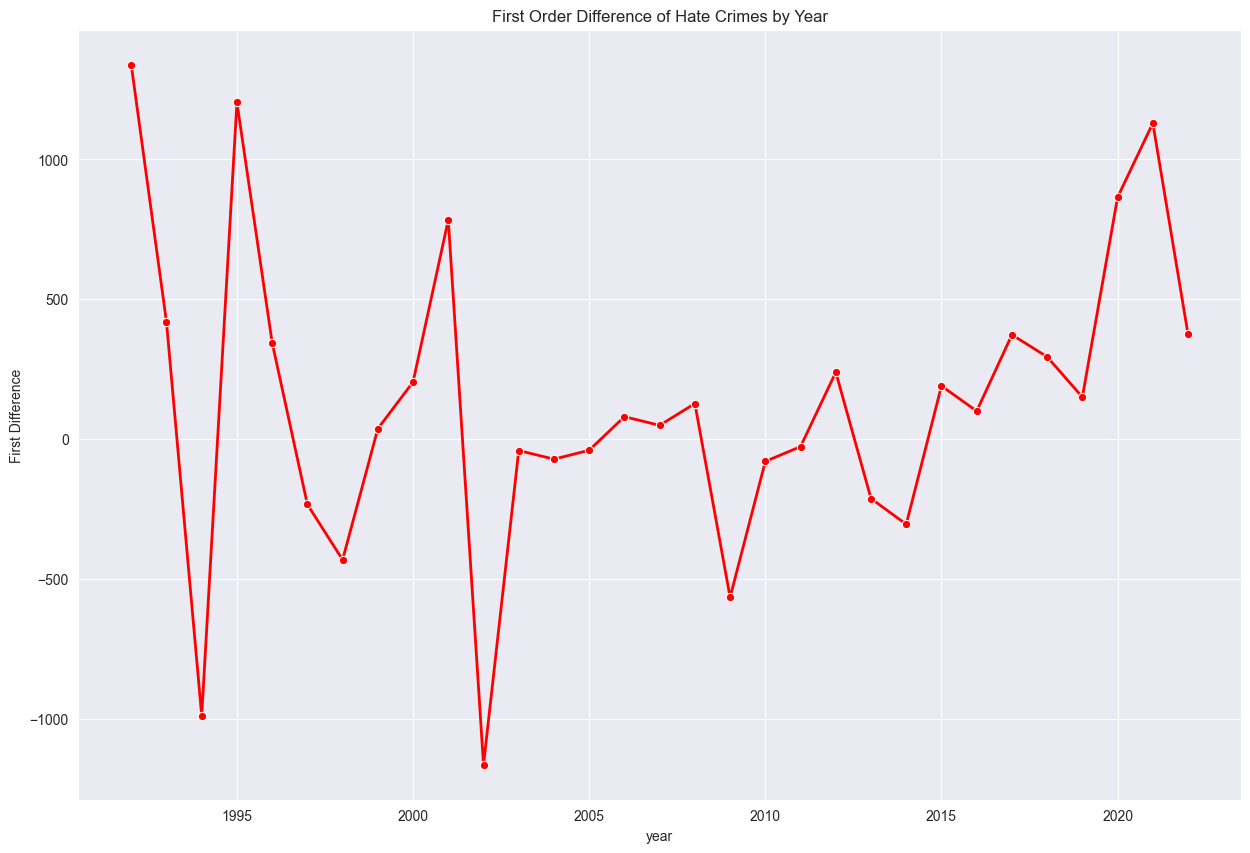

In [106]:
# Plot the first order difference of the number of hate crimes by year
plt.figure(figsize=(15, 10))
data_year['First Difference'] = data_year['Number of incidents'].diff()
sns.lineplot(data=data_year, x='year', y='First Difference', linewidth=2, marker='o', color='red')
plt.title('First Order Difference of Hate Crimes by Year')
plt.show()

### Bar plot of the number of hate crimes by year

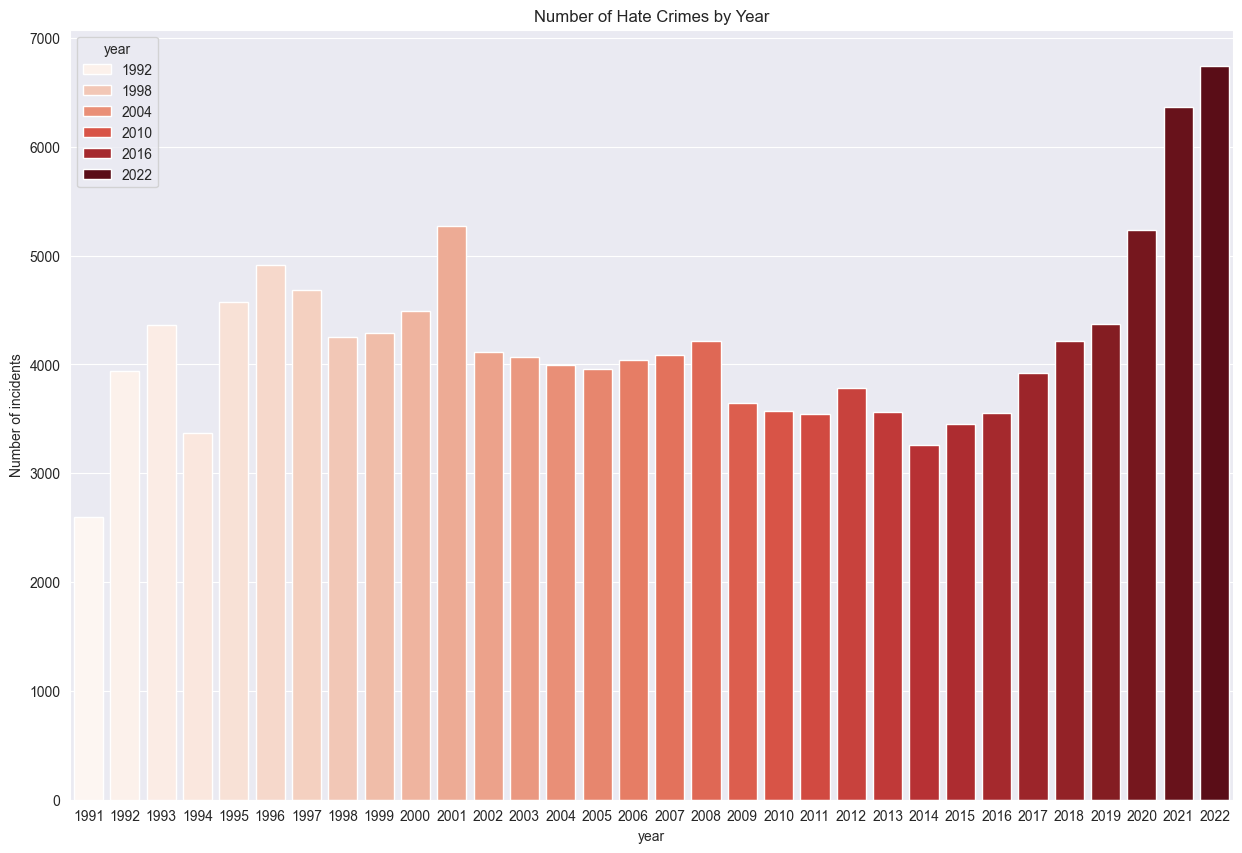

In [107]:
# Plot the number of hate crimes by year
plt.figure(figsize=(15, 10))
sns.barplot(data=data_year, x='year', y='Number of incidents', palette='Reds', hue='year')
plt.title('Number of Hate Crimes by Year')
plt.show()

In [108]:
# plot summary statistics
data_year.describe()

,year,Number of incidents,Rolling Average,First Difference
count,32.000000,32.000000,28.000000,31.000000
mean,2006.500000,4201.218750,4121.521429,133.483871
std,9.380832,833.194387,449.467228,554.877576
min,1991.000000,2600.000000,3520.400000,-1165.000000
25%,1998.750000,3628.000000,3763.100000,-76.000000
50%,2006.500000,4078.500000,4047.000000,100.000000
75%,2014.250000,4399.750000,4403.900000,359.000000
max,2022.000000,6738.000000,5384.800000,1339.000000


### Forecasting the Number of Hate Crimes by Year

In [109]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def find_best_alpha(train, test):
    max_alpha = 1
    alpha = 0.01
    best_alpha = 0
    best_rms = 100000000
    best_y_hat_avg = test.copy()
    y_hat_avg = test.copy()
    while alpha <= max_alpha:
        pred = []
        ft = pd.DataFrame.ewm(train, span = 10).mean()['Number of incidents'].iloc[-1]
        pred.append(ft)
        for i in range(1,len(test['Number of incidents'])):
            dt = test['Number of incidents'].iloc[i]
            ft_plus_1 = alpha*dt + (1-alpha)*ft
            pred.append(ft_plus_1)
            ft = ft_plus_1
        y_hat_avg['SES'] = pd.Series(pred).values
        rms = sqrt(mean_squared_error(test['Number of incidents'], y_hat_avg.SES))
        if rms < best_rms:
            best_rms = rms
            best_alpha = alpha
            best_y_hat_avg = y_hat_avg.copy()
        alpha += 0.01
    return best_alpha, best_y_hat_avg, best_rms

In [110]:
# Split the data into training and testing sets
train = data_year[data_year['year'] < 2017]
test = data_year[data_year['year'] >= 2017]

Text(0.5, 1.0, 'Training and Testing Sets')

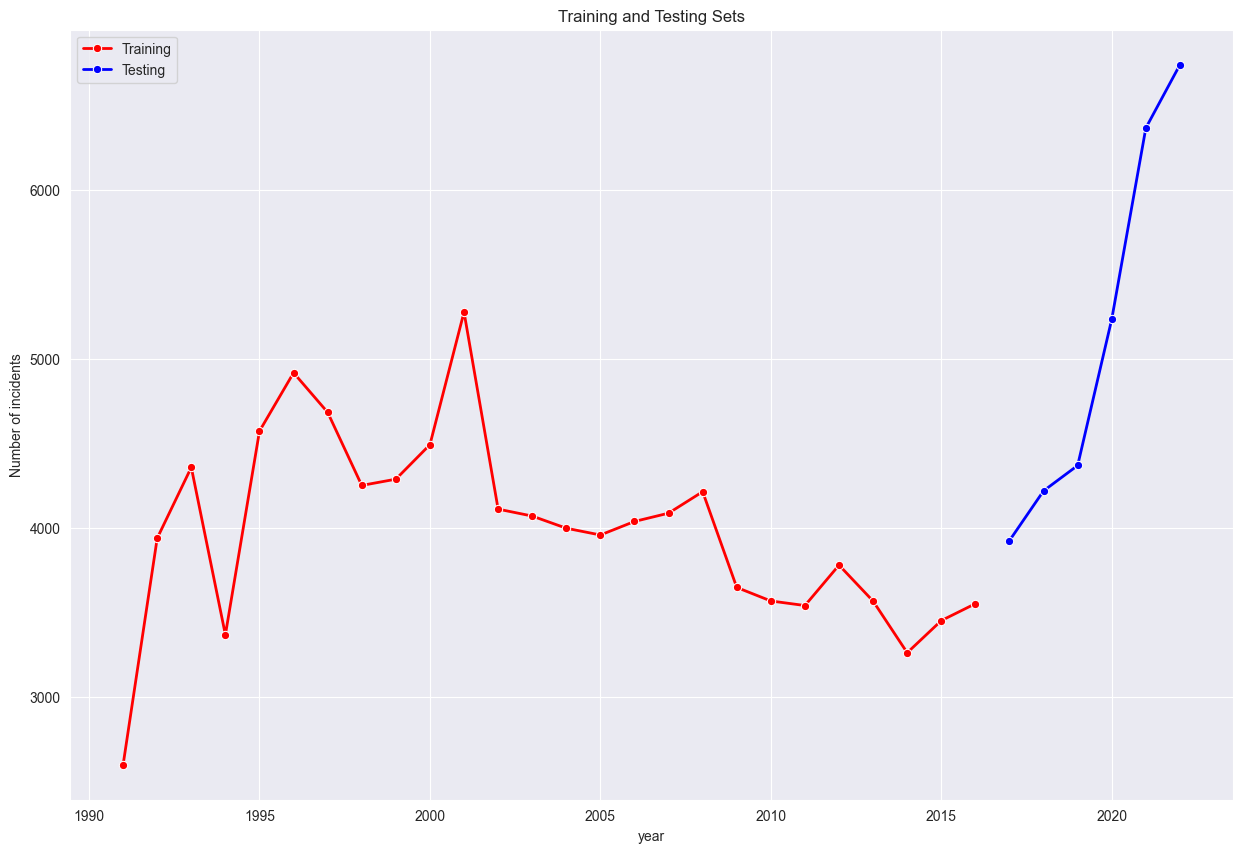

In [111]:
# plot the training and testing sets
plt.figure(figsize=(15, 10))
sns.lineplot(data=train, x='year', y='Number of incidents', linewidth=2, marker='o', color='red', label='Training')
sns.lineplot(data=test, x='year', y='Number of incidents', linewidth=2, marker='o', color='blue', label='Testing')
plt.title('Training and Testing Sets')

In [112]:
# Find the best alpha value
best_alpha, best_y_hat_avg, best_rms = find_best_alpha(train, test)

In [118]:
print('Best Alpha:', best_alpha)
print('Best RMS:', best_rms)

Best Alpha: 0.9900000000000007
Best RMS: 112.5452592212318


In [113]:
best_y_hat_avg

,year,Number of incidents,Rolling Average,First Difference,SES
26,2017,3925,3551.6,373.0,3649.783381
27,2018,4219,3682.0,294.0,4213.307834
28,2019,4369,3903.4,150.0,4367.443078
29,2020,5234,4259.8,865.0,5225.334431
30,2021,6364,4822.2,1130.0,6352.613344
31,2022,6738,5384.8,374.0,6734.146133


Text(0.5, 1.0, 'Forecasting the Number of Hate Crimes by Year')

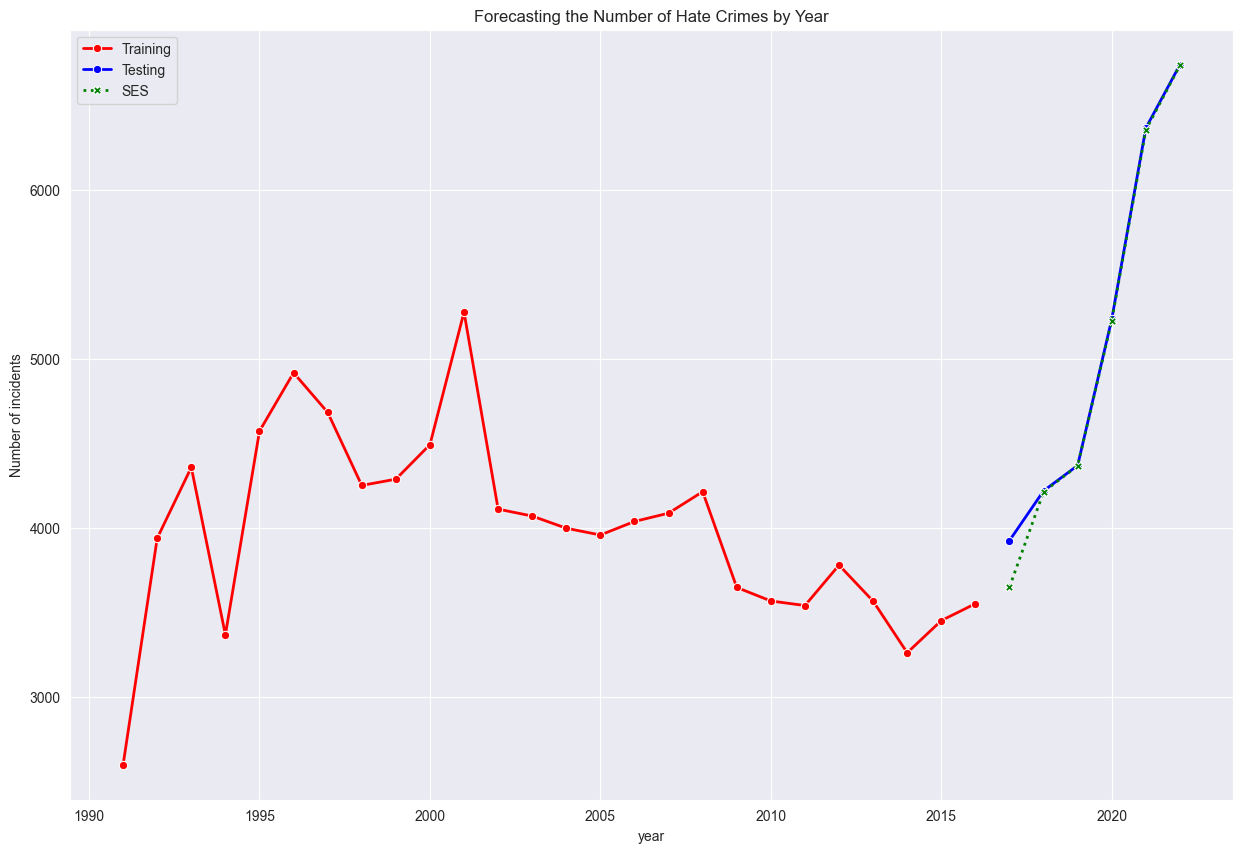

In [114]:
# plot the best alpha value
plt.figure(figsize=(15, 10))
sns.lineplot(data=train, x='year', y='Number of incidents', linewidth=2, marker='o', color='red', label='Training')
sns.lineplot(data=test, x='year', y='Number of incidents', linewidth=2, marker='o', color='blue', label='Testing')
sns.lineplot(data=best_y_hat_avg, x='year', y='SES', linewidth=2, marker='X', color='green', label='SES', linestyle='dotted')
plt.title('Forecasting the Number of Hate Crimes by Year')

In [115]:
# function that would predict the number of crimes given a year
def predict_hate_crimes(year):
    ft = pd.DataFrame.ewm(data_year, span = 10).mean()['Number of incidents'].iloc[-1]
    dt = data_year[data_year['year'] == year]['Number of incidents'].values[0]
    alpha = best_alpha
    ft_plus_1 = alpha*dt + (1-alpha)*ft
    return ft_plus_1

In [116]:
# predict the number of hate crimes for the year 2021
predict_hate_crimes(2021)   

6349.823204266665

In [117]:
# output the actual number of hate crimes for the year 2021
data_year[data_year['year'] == 2021]['Number of incidents'].values[0]

6364